In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./uploads/vgsales.csv')
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df = data.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

As 10 maiores publicadoras por vendas Globais

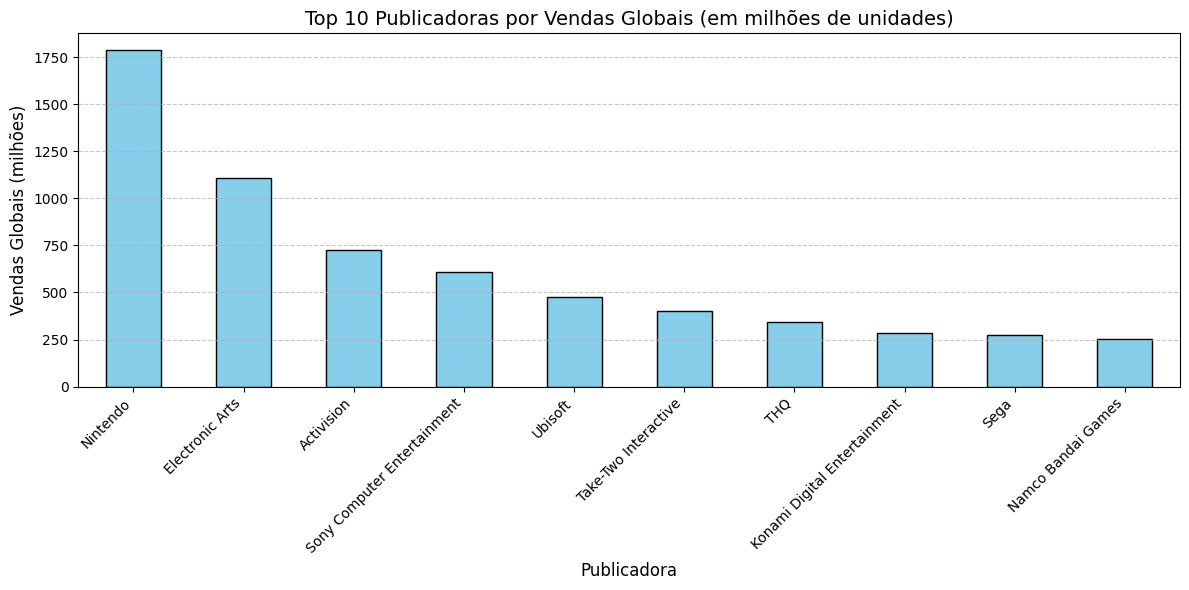

In [4]:
Publicadora_por_Vendas = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
Publicadora_por_Vendas.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Publicadoras por Vendas Globais (em milhões de unidades)', fontsize=14)
plt.xlabel('Publicadora', fontsize=12)
plt.ylabel('Vendas Globais (milhões)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Os jogos mais vendidos por região

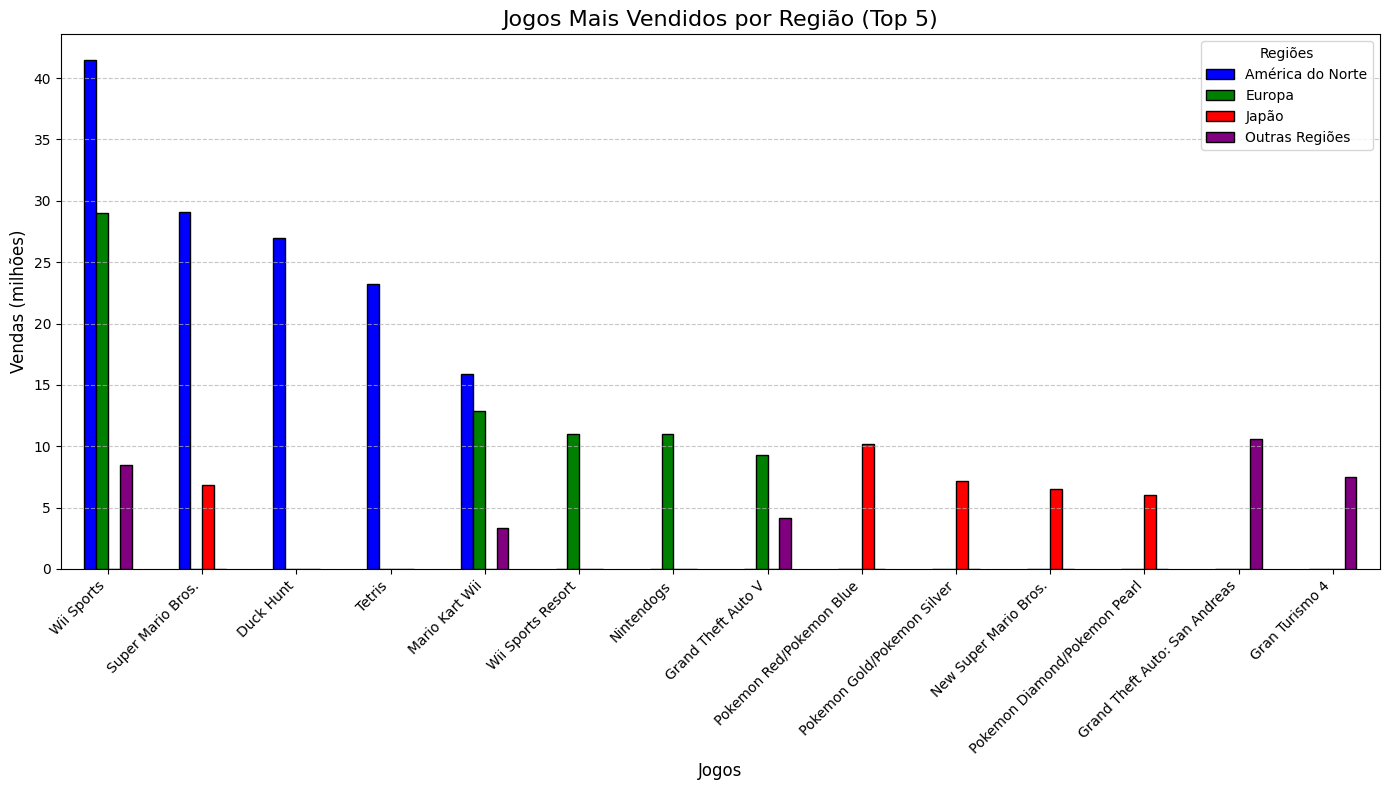

In [5]:
vendas_regiao = data[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

maiores_NA = vendas_regiao.nlargest(5, 'NA_Sales')[['Name', 'NA_Sales']].set_index('Name')
maiores_EU = vendas_regiao.nlargest(5, 'EU_Sales')[['Name', 'EU_Sales']].set_index('Name')
maiores_JP = vendas_regiao.nlargest(5, 'JP_Sales')[['Name', 'JP_Sales']].set_index('Name')
maiores_Outras_Regioes = vendas_regiao.nlargest(5, 'Other_Sales')[['Name', 'Other_Sales']].set_index('Name')

top_jogos = pd.concat([
    maiores_NA.rename(columns={'NA_Sales': 'América do Norte'}),
    maiores_EU.rename(columns={'EU_Sales': 'Europa'}),
    maiores_JP.rename(columns={'JP_Sales': 'Japão'}),
    maiores_Outras_Regioes.rename(columns={'Other_Sales': 'Outras Regiões'})
], axis=1).fillna(0)

top_jogos.plot(kind='bar', figsize=(14, 8), color=['blue', 'green', 'red', 'purple'], edgecolor='black')

plt.title('Jogos Mais Vendidos por Região (Top 5)', fontsize=16)
plt.xlabel('Jogos', fontsize=12)
plt.ylabel('Vendas (milhões)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Regiões', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Gênero Predominante por Região

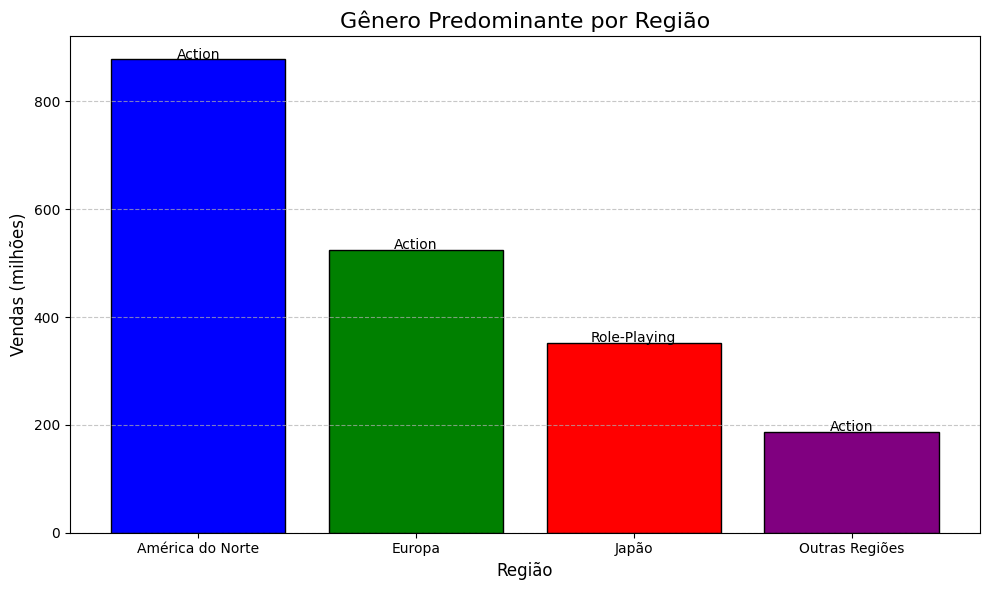

In [6]:
genero_vendas = data.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

maiores_generos = genero_vendas.idxmax()

maiores_generos_vendas = pd.DataFrame({
    'Região': ['América do Norte', 'Europa', 'Japão', 'Outras Regiões'],
    'Gênero Predominante': maiores_generos.values,
    'Vendas (milhões)': [genero_vendas.loc[genre, region] for region, genre in maiores_generos.items()]
})

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple']
plt.bar(maiores_generos_vendas['Região'], maiores_generos_vendas['Vendas (milhões)'], color=colors, edgecolor='black')


for idx, row in maiores_generos_vendas.iterrows():
    plt.text(idx, row['Vendas (milhões)'] + 1, row['Gênero Predominante'], ha='center', fontsize=10)

plt.title('Gênero Predominante por Região', fontsize=16)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Vendas (milhões)', fontsize=12)
plt.xticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
